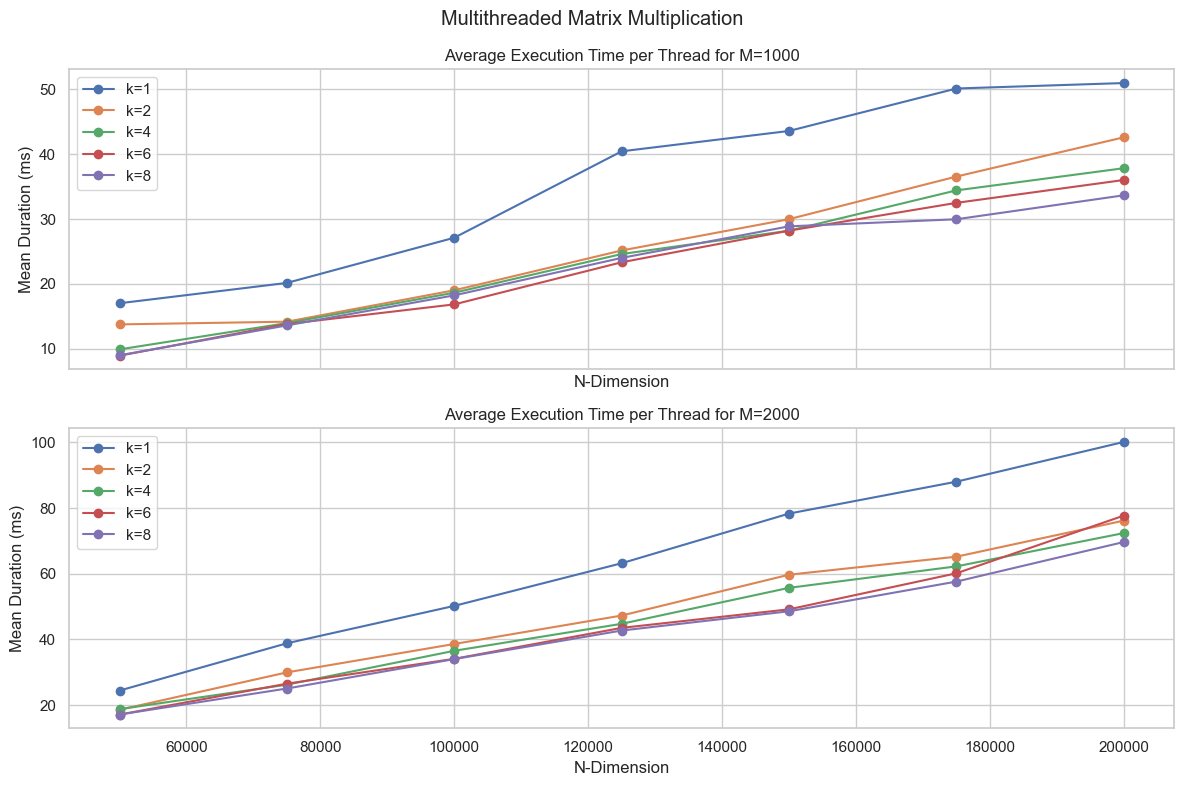

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv("matrix_mult_results.csv")

# Compute mean duration for each (n, m, k) setup
df_mean = df.groupby(["n", "m", "k"], as_index=False)["duration_ms"].mean()

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

m = 1000
for k_val in sorted(df_mean["k"].unique()):
    subset = df_mean[(df_mean["k"] == k_val) & (df_mean["m"] == m)]
    axes[0].plot(subset["n"], subset["duration_ms"], marker="o", label=f"k={k_val}")

axes[0].set_title(f"Average Execution Time per Thread for M={m}")
axes[0].set_xlabel("N-Dimension")
axes[0].set_ylabel("Mean Duration (ms)")
axes[0].legend()

m = 2000
for k_val in sorted(df_mean["k"].unique()):
    subset = df_mean[(df_mean["k"] == k_val) & (df_mean["m"] == m)]
    axes[1].plot(subset["n"], subset["duration_ms"], marker="o", label=f"k={k_val}")

axes[1].set_title(f"Average Execution Time per Thread for M={m}")
axes[1].set_xlabel("N-Dimension")
axes[1].set_ylabel("Mean Duration (ms)")
axes[1].legend()

fig.suptitle("Multithreaded Matrix Multiplication")
plt.tight_layout()
plt.show()

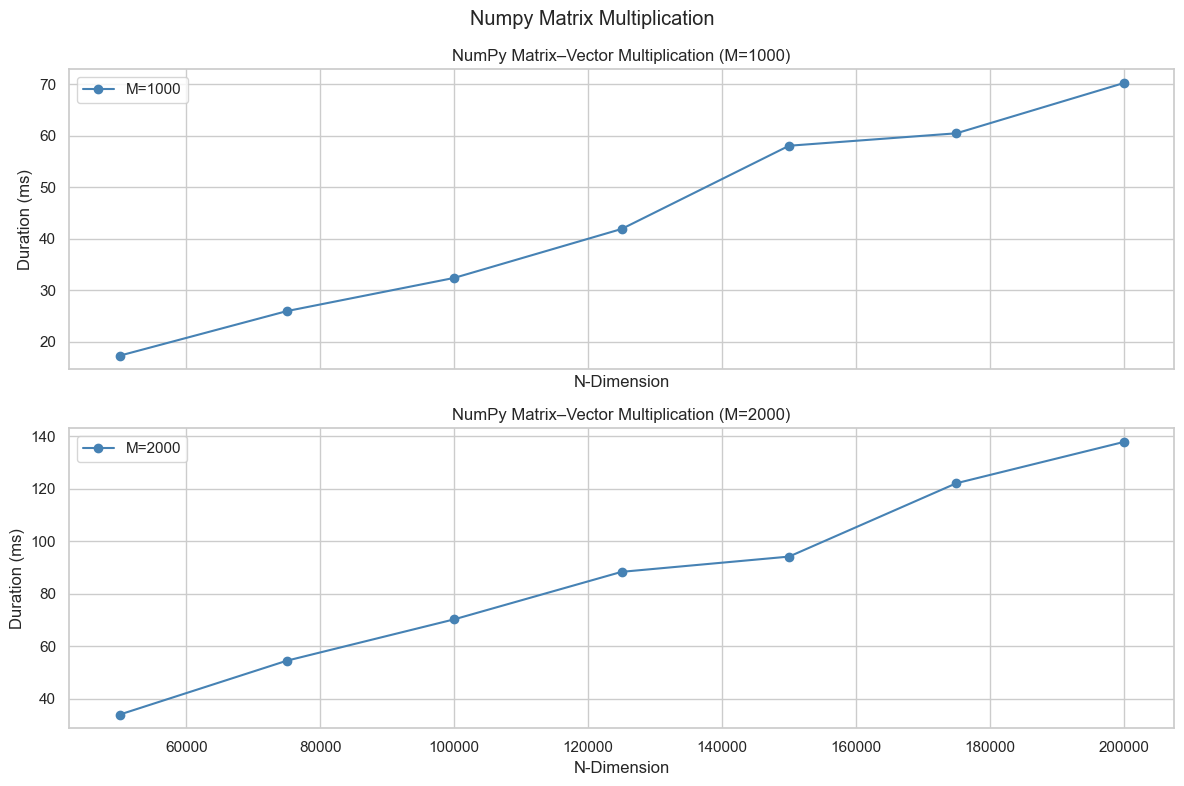

In [2]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


def numpy_benchmark(n_values, m_values, runs=3):
    results = []
    for m in m_values:
        for n in n_values:
            durations = []
            for _ in range(runs):
                A = np.random.uniform(0, 10, size=(n, m))
                x = np.random.uniform(0, 10, size=m)
                start = time.perf_counter()
                y = A @ x
                end = time.perf_counter()
                durations.append((end - start) * 1000)
            mean_duration = np.mean(durations)
            results.append({"n": n, "m": m, "duration_ms": mean_duration})
    return pd.DataFrame(results)


# Experiment Parameters
m_values = [1000, 2000]
n_values = [i for i in range(50000, 200001, 25000)]

df_numpy = numpy_benchmark(n_values, m_values)

fig, axes = plt.subplots(len(m_values), 1, figsize=(12, 8), sharex=True)

for i, m in enumerate(m_values):
    ax = axes[i] if len(m_values) > 1 else axes
    subset = df_numpy[df_numpy["m"] == m]
    ax.plot(
        subset["n"],
        subset["duration_ms"],
        marker="o",
        label=f"M={m}",
        color="steelblue",
    )
    ax.set_title(f"NumPy Matrix–Vector Multiplication (M={m})")
    ax.set_xlabel("N-Dimension")
    ax.set_ylabel("Duration (ms)")
    ax.legend()

fig.suptitle("Numpy Matrix Multiplication")
plt.tight_layout()
plt.show()
